### ~~todo lower dataset size~~
### ~~todo generate a single set~~
### ~~todo import into sql~~
### ~~todo get rules working~~
### todo add sql commands to this notebook
### todo redo exploration and code replacement in this notebook
### todo add nature of incident level information into breakdown 
### todo link to description and severity level back into data after synthesis
### todo add hospital

In [ ]:
library(RODBC)

In [15]:
setwd("C:/Users/GIGNWI_Ar208671/PycharmProjects/synthetic_data")

In [16]:
library("dplyr")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [17]:
library("sqldf")
library("synthpop")

Warning message:
"package 'sqldf' was built under R version 3.5.3"Loading required package: gsubfn
Warning message:
"package 'gsubfn' was built under R version 3.5.3"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.5.3"Loading required package: RSQLite
Warning message:
"package 'synthpop' was built under R version 3.5.3"Loading required package: lattice
Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: nnet
Loading required package: ggplot2


# load csv into DataFrame

In [18]:
mydata = read.csv(file="C:/Users/GIGNWI_Ar208671/PycharmProjects/synthetic_data/resources/ods.csv", header=TRUE, sep=",")

In [19]:
mydata$ConveyedFlag<-as.logical(mydata$ConveyedFlag)

In [20]:
str(mydata)

'data.frame':	386227 obs. of  23 variables:
 $ X                                    : int  0 1 2 3 4 5 6 7 8 9 ...
 $ ConveyedFlag                         : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ IncidentStopCodeDescription          : Factor w/ 38 levels "","Cancelled Pre-Arrival",..: 1 1 1 1 1 1 15 15 1 1 ...
 $ AgeOfPatient                         : num  72 63 18 81 70 83 55 32 73 16 ...
 $ PatientGender                        : Factor w/ 3 levels "","F","M": 3 3 2 2 2 2 3 2 2 2 ...
 $ NEWS1_TOTAL                          : num  0 5 NA NA NA 0 NA 0 NA NA ...
 $ GCS1_TOTAL                           : num  15 15 15 15 15 15 15 15 15 15 ...
 $ GCS1_VERB                            : num  5 5 5 5 5 1 5 5 5 5 ...
 $ PAIN1                                : num  0 5 NA NA NA 2 NA 0 10 NA ...
 $ MPDSPriorityType                     : Factor w/ 5 levels "AMBER1","AMBER2",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Dispatch.Code                        : Factor w/ 951 levels "01A01","01A02",..: 1 1 1 1 1 

In [21]:
typeof(mydata)

[1] "list"

In [22]:
typeof(as.data.frame(mydata))

[1] "list"

In [23]:
colnames(mydata)

[1] "X"                                    
 [2] "ConveyedFlag"                         
 [3] "IncidentStopCodeDescription"          
 [4] "AgeOfPatient"                         
 [5] "PatientGender"                        
 [6] "NEWS1_TOTAL"                          
 [7] "GCS1_TOTAL"                           
 [8] "GCS1_VERB"                            
 [9] "PAIN1"                                
[10] "MPDSPriorityType"                     
[11] "Dispatch.Code"                        
[12] "GeographyPopulationDeprivationDecile" 
[13] "incident_day"                         
[14] "incident_hour"                        
[15] "ResponseTimeMinutes"                  
[16] "time_on_scene"                        
[17] "time_to_hospital"                     
[18] "time_waiting_at_hospital"             
[19] "HospitalName"                         
[20] "HealthBoardAreaNameOfIncidentLocation"
[21] "EDOutcome"                            
[22] "DischargeDestination"                 
[23] "Incident.Nature"

In [24]:
my.seed = 0

In [25]:
mydata$X <- NULL
mydata$MPDSPriorityType <- NULL
mydata$Incident.Nature<-NULL

In [26]:
mydata$MPDSPriorityType <- NULL

In [27]:
mydata$Incident.Nature<-NULL

In [28]:
c(5,6,1,1,4)

[1] 5 6 1 1 4

# Rules

Defining semantic rules

In [29]:
rules.amb <- list(
    PAIN1 = "GCS1_VERB <3",
    IncidentStopCodeDescription ="ConveyedFlag == 1",
    time_on_scene = "ConveyedFlag == 0",
    time_to_hospital = "ConveyedFlag == 0",
    time_waiting_at_hospital = "ConveyedFlag == 0",
    #Hospital = "ï..ConveyedFlag = 0",
    EDOutcome = "ConveyedFlag == 0",
    DischargeDestination = "ConveyedFlag == 0"

)
rule_values.amb <- list(
    PAIN1 = NA,
    IncidentStopCodeDescription = NA,
    time_on_scene = NA,
    time_to_hospital = NA,
    time_waiting_at_hospital = NA,
    #Hospital = NA,
    EDOutcome = NA,
    DischargeDestination = NA
    
)


In [30]:
rules.amb

$PAIN1
[1] "GCS1_VERB <3"

$IncidentStopCodeDescription
[1] "ConveyedFlag == 1"

$time_on_scene
[1] "ConveyedFlag == 0"

$time_to_hospital
[1] "ConveyedFlag == 0"

$time_waiting_at_hospital
[1] "ConveyedFlag == 0"

$EDOutcome
[1] "ConveyedFlag == 0"

$DischargeDestination
[1] "ConveyedFlag == 0"

In [ ]:
head(mydata)

# Predictor matrix

In [32]:
#sds.init <- syn(data = sample(mydata),m=1,visit.sequence = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19), k = 10000,drop.not.used= TRUE)

In [33]:
length(colnames(mydata))

[1] 20

In [34]:
length(colnames(mydata))

[1] 20

In [35]:
#class(sds.init$predictor.matrix)

In [36]:
mm <- matrix(0,20,20)

In [37]:
rownames(mm) <- colnames(mydata)
colnames(mm) <- colnames(mydata)

In [38]:
mm

ConveyedFlag IncidentStopCodeDescription
ConveyedFlag                          0            0                          
IncidentStopCodeDescription           0            0                          
AgeOfPatient                          0            0                          
PatientGender                         0            0                          
NEWS1_TOTAL                           0            0                          
GCS1_TOTAL                            0            0                          
GCS1_VERB                             0            0                          
PAIN1                                 0            0                          
Dispatch.Code                         0            0                          
GeographyPopulationDeprivationDecile  0            0                          
incident_day                          0            0                          
incident_hour                         0            0                          
ResponseTimeMinutes                   0            0                          
time_on_scene                         0            0                          
time_to_hospital                      0            0                          
time_waiting_at_hospital              0            0                          
HospitalName                          0            0                          
HealthBoardAreaNameOfIncidentLocation 0            0                          
EDOutcome                             0            0                          
DischargeDestination                  0            0                          
                                      AgeOfPatient PatientGender NEWS1_TOTAL
ConveyedFlag                          0            0             0          
IncidentStopCodeDescription           0            0             0          
AgeOfPatient                          0            0             0          
PatientGender                         0            0             0          
NEWS1_TOTAL                           0            0             0          
GCS1_TOTAL                            0            0             0          
GCS1_VERB                             0            0             0          
PAIN1                                 0            0             0          
Dispatch.Code                         0            0             0          
GeographyPopulationDeprivationDecile  0            0             0          
incident_day                          0            0             0          
incident_hour                         0            0             0          
ResponseTimeMinutes                   0            0             0          
time_on_scene                         0            0             0          
time_to_hospital                      0            0             0          
time_waiting_at_hospital              0            0             0          
HospitalName                          0            0             0          
HealthBoardAreaNameOfIncidentLocation 0            0             0          
EDOutcome                             0            0             0          
DischargeDestination                  0            0             0          
                                      GCS1_TOTAL GCS1_VERB PAIN1 Dispatch.Code
ConveyedFlag                          0          0         0     0            
IncidentStopCodeDescription           0          0         0     0            
AgeOfPatient                          0          0         0     0            
PatientGender                         0          0         0     0            
NEWS1_TOTAL                           0          0         0     0            
GCS1_TOTAL                            0          0         0     0            
GCS1_VERB                             0          0         0     0            
PAIN1                                 0          0         0     0            
Dispatch.Code                         0          0 

Dispatch Code

In [39]:
mm[7,1] <- 1

Response Time Minutes

In [40]:
mm[8,7] <-1

NEWS1_total

In [41]:
mm[9,7] <- 1
mm[9,1] <- 1

GCS1_total

In [42]:
mm[10,7]<-1
mm[10,8]<-1

pain

In [43]:
mm[12,1]<-1
mm[12,7] <- 1

conveyed

In [44]:
#mm[13,12]<-1
mm[13,9]<-1
mm[13,7]<-1

time on scene

In [45]:
mm[15,1]<-1
mm[15,7]<-1
mm[15,9]<-1
mm[15,3]<-1

Time to hospital

In [46]:
mm[16,7]<-1
mm[16,4]<-1
mm[16,3]<-1

 time waiting at hospital

In [47]:
mm[18,1]<-1 # age
mm[18,15]<-1 #time_on_Scene
mm[18,8]<-1 # response_time_minutes
mm[18,17]<-1 #Hospital name

ED Outcome

In [48]:
mm[19,10]<-1 # GCS1
mm[19,7]<-1 # Dispatch
mm[19,9]<-1 # news
mm[20,17]<-1 # Hospital Name

Discharge destination

In [49]:
mm[20,9]<-1 # news
mm[20,12]<-1 # pain
mm[20,1]<-1 # age
mm[20,17]<-1 # Hospital Name

In [50]:
mm

ConveyedFlag IncidentStopCodeDescription
ConveyedFlag                          0            0                          
IncidentStopCodeDescription           0            0                          
AgeOfPatient                          0            0                          
PatientGender                         0            0                          
NEWS1_TOTAL                           0            0                          
GCS1_TOTAL                            0            0                          
GCS1_VERB                             1            0                          
PAIN1                                 0            0                          
Dispatch.Code                         1            0                          
GeographyPopulationDeprivationDecile  0            0                          
incident_day                          0            0                          
incident_hour                         1            0                          
ResponseTimeMinutes                   0            0                          
time_on_scene                         0            0                          
time_to_hospital                      1            0                          
time_waiting_at_hospital              0            0                          
HospitalName                          0            0                          
HealthBoardAreaNameOfIncidentLocation 1            0                          
EDOutcome                             0            0                          
DischargeDestination                  1            0                          
                                      AgeOfPatient PatientGender NEWS1_TOTAL
ConveyedFlag                          0            0             0          
IncidentStopCodeDescription           0            0             0          
AgeOfPatient                          0            0             0          
PatientGender                         0            0             0          
NEWS1_TOTAL                           0            0             0          
GCS1_TOTAL                            0            0             0          
GCS1_VERB                             0            0             0          
PAIN1                                 0            0             0          
Dispatch.Code                         0            0             0          
GeographyPopulationDeprivationDecile  0            0             0          
incident_day                          0            0             0          
incident_hour                         0            0             0          
ResponseTimeMinutes                   0            0             0          
time_on_scene                         0            0             0          
time_to_hospital                      1            0             0          
time_waiting_at_hospital              1            1             0          
HospitalName                          0            0             0          
HealthBoardAreaNameOfIncidentLocation 0            0             0          
EDOutcome                             0            0             0          
DischargeDestination                  0            0             0          
                                      GCS1_TOTAL GCS1_VERB PAIN1 Dispatch.Code
ConveyedFlag                          0          0         0     0            
IncidentStopCodeDescription           0          0         0     0            
AgeOfPatient                          0          0         0     0            
PatientGender                         0          0         0     0            
NEWS1_TOTAL                           0          0         0     0            
GCS1_TOTAL                            0          0         0     0            
GCS1_VERB                             0          0         0     0            
PAIN1                                 0          1         0     0            
Dispatch.Code                         0          1 

# Synthesis

In [51]:
working_method = c("sample","sample","sample","sample","sample","sample","cart","cart","cart","cart","cart","cart","cart","cart","cart","cart","cart","cart","cart","cart")

In [52]:
problem_method = c("sample","sample","sample","sample","sample","sample","parametric","cart","cart","cart","cart","cart","cart","cart","cart","cart","cart","cart","cart","cart")

In [53]:
head(mydata)

ConveyedFlag IncidentStopCodeDescription AgeOfPatient PatientGender
1 TRUE                                     72           M            
2 TRUE                                     63           M            
3 TRUE                                     18           F            
4 TRUE                                     81           F            
5 TRUE                                     70           F            
6 TRUE                                     83           F            
  NEWS1_TOTAL GCS1_TOTAL GCS1_VERB PAIN1 Dispatch.Code
1  0          15         5          0    01A01        
2  5          15         5          5    01A01        
3 NA          15         5         NA    01A01        
4 NA          15         5         NA    01A01        
5 NA          15         5         NA    01A01        
6  0          15         1          2    01A01        
  GeographyPopulationDeprivationDecile incident_day incident_hour
1 4                                     1            6           
2 5                                     1           23           
3 2                                    21           21           
4 3                                    26           20           
5 7                                     6           22           
6 5                                    16           10           
  ResponseTimeMinutes time_on_scene time_to_hospital time_waiting_at_hospital
1  92                 43            21               15                      
2  46                 45            41               15                      
3  10                 22             6               12                      
4 122                 24            41               27                      
5 194                 26            50               28                      
6  23                 18            24               10                      
  HospitalName HealthBoardAreaNameOfIncidentLocation EDOutcome        
1 Hosp_43      HB_5                                  Admitted         
2 Hosp_12      HB_5                                  Admitted         
3 Hosp_12      HB_5                                  Discharge No F-up
4 Hosp_12      HB_5                                  Discharge No F-up
5 Hosp_12      HB_5                                                   
6 Hosp_12      HB_5                                  Discharge No F-up
  DischargeDestination
1 Usual residence     
2 Usual residence     
3                     
4                     
5                     
6

In [54]:
working_list = c(1,2,3,4,7,8,9,11,12,13,14,15,16,18,20,24,27,29,30,31,32,33)


In [55]:
problem_list = c(5,6,10,17,19,21,22,23,25,26,28)

In [56]:
dim(mydata)

[1] 386227     20

In [57]:
print(Sys.time())

[1] "2019-07-29 12:33:00 BST"


In [58]:
data_sample = mydata[sample(nrow(mydata), 100), ]

In [59]:
typeof(rules.amb)

[1] "list"

In [60]:
# sds.init <- syn(data = data_sample,m=1,
#                 visit.sequence = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20), 
#                predictor.matrix = mm,
#                 drop.not.used= TRUE,
#                 rules = rules.amb,
#                 rvalues = rule_values.amb,
#                 maxfaclevels = 60
#                )


In [61]:
# sds.init$syn

# Batch synthesis

In [62]:
mydata = read.csv(file="C:/Users/GIGNWI_Ar208671/PycharmProjects/synthetic_data/resources/ods.csv", header=TRUE, sep=",")
mydata$X <- NULL
mydata$MPDSPriorityType <- NULL
mydata$Incident.Nature<-NULL
mydata$ConveyedFlag<-as.logical(mydata$ConveyedFlag)

In [63]:
split_df = split(mydata,substr(mydata$Dispatch.Code, start=1,stop=2))

todo: work out problem column by playing with parametric/CART 

In [ ]:
for (i in working_list)#length(split_df)
{
    print(i)
    sds.init <- syn(data = droplevels(split_df[[i]]),m=1,
                visit.sequence = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20), 
               predictor.matrix = mm,
                drop.not.used= TRUE,
                rules = rules.amb,
                rvalues = rule_values.amb,
                method = working_method
               )
    write.csv(sds.init$syn, file = paste("C:/Users/GIGNWI_Ar208671/PycharmProjects/synth/datasynth/resources/Batch/",toString(i),"_syn.csv", sep = ""))
}

In [ ]:
for (i in problem_list)#length(split_df)
{
    print(i)
    sds.init <- syn(data = droplevels(split_df[[i]]),m=1,
                visit.sequence = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20), 
               predictor.matrix = mm,
                drop.not.used= TRUE,
                rules = rules.amb,
                rvalues = rule_values.amb,
                method = problem_method
               )
    write.csv(sds.init$syn, file = paste("C:/Users/GIGNWI_Ar208671/PycharmProjects/synth/datasynth/resources/Batch/",toString(i),"_syn.csv", sep = ""))
}

In [70]:
temp <-split_df[33]

# rules for HB and Hospital

In [32]:
rules_frame <- subset(mydata, select = c("HealthBoardAreaNameOfIncidentLocation","HospitalName"))

In [36]:
rules_frame <-unique(rules_frame)

In [40]:
rules_frame

HealthBoardAreaNameOfIncidentLocation HospitalName
1      HB_5                                  Hosp_43     
2      HB_5                                  Hosp_12     
7      HB_6                                  Hosp_-1     
8      HB_0                                  Hosp_-1     
9      HB_5                                  Hosp_3      
13     HB_5                                  Hosp_-1     
19     HB_0                                  Hosp_23     
24     HB_6                                  Hosp_23     
29     HB_6                                  Hosp_3      
41     HB_2                                  Hosp_47     
43     HB_2                                  Hosp_-1     
45     HB_2                                  Hosp_11     
46     HB_2                                  Hosp_21     
63     HB_1                                  Hosp_26     
64     HB_4                                  Hosp_32     
65     HB_4                                  Hosp_27     
67     HB_1                                  Hosp_-1     
68     HB_1                                  Hosp_33     
69     HB_3                                  Hosp_41     
70     HB_1                                  Hosp_41     
72     HB_3                                  Hosp_-1     
80     HB_1                                  Hosp_27     
113    HB_0                                  Hosp_12     
116    HB_0                                  Hosp_29     
131    HB_6                                  Hosp_26     
178    HB_4                                  Hosp_-1     
251    HB_3                                  Hosp_32     
289    HB_2                                  Hosp_15     
349    HB_5                                  Hosp_23     
402    HB_2                                  Hosp_3      
<U+22EE>      <U+22EE>                              <U+22EE>    
68066  HB_6                                  Hosp_24     
72575  HB_4                                  Hosp_23     
72658  HB_3                                  Hosp_23     
91369  HB_1                                  Hosp_48     
103992 HB_1                                  Hosp_24     
106763 HB_2                                  Other_Hosp  
113592 HB_1                                  Hosp_29     
144449 HB_4                                  Hosp_33     
166431 HB_1                                  Other_Hosp  
237355 HB_5                                  Hosp_29     
242263 HB_5                                  Other_Hosp  
245995 HB_5                                  Hosp_33     
246181 HB_0                                  Hosp_33     
246922 HB_6                                  Hosp_29     
247538 HB_5                                  Hosp_11     
248141 HB_5                                  Hosp_21     
248232 HB_5                                  Hosp_27     
248322 HB_5                                  Hosp_32     
248436 HB_5                                  Hosp_26     
248623 HB_4                                  Hosp_12     
250769 HB_5                                  Hosp_28     
255779 HB_-1                                 Hosp_11     
317167 HB_6                                  Hosp_11     
357170 HB_4                                  Other_Hosp  
361643 HB_0                                  Hosp_28     
366529 HB_6                                  Hosp_35     
368805 HB_5                                  Hosp_35     
369812 HB_0                                  Other_Hosp  
370334 HB_2                                  Hosp_41     
376110 HB_3                                  Hosp_26

In [47]:
rules_frame[order(rules_frame$HealthBoardAreaNameOfIncidentLocation),]

write.csv(rules_frame, file = "C:/Users/GIGNWI_Ar208671/PycharmProjects/synthetic_data/resources/rules.csv")

HealthBoardAreaNameOfIncidentLocation HospitalName
5214   HB_-1                                 Hosp_-1     
13564  HB_-1                                 Hosp_26     
15801  HB_-1                                 Hosp_21     
20401  HB_-1                                 Hosp_33     
255779 HB_-1                                 Hosp_11     
8      HB_0                                  Hosp_-1     
19     HB_0                                  Hosp_23     
113    HB_0                                  Hosp_12     
116    HB_0                                  Hosp_29     
899    HB_0                                  Hosp_41     
2125   HB_0                                  Hosp_27     
2765   HB_0                                  Hosp_32     
8947   HB_0                                  Hosp_15     
31895  HB_0                                  Hosp_24     
40207  HB_0                                  Hosp_35     
246181 HB_0                                  Hosp_33     
361643 HB_0                                  Hosp_28     
369812 HB_0                                  Other_Hosp  
63     HB_1                                  Hosp_26     
67     HB_1                                  Hosp_-1     
68     HB_1                                  Hosp_33     
70     HB_1                                  Hosp_41     
80     HB_1                                  Hosp_27     
9367   HB_1                                  Hosp_23     
12873  HB_1                                  Hosp_15     
22738  HB_1                                  Hosp_32     
91369  HB_1                                  Hosp_48     
103992 HB_1                                  Hosp_24     
113592 HB_1                                  Hosp_29     
166431 HB_1                                  Other_Hosp  
<U+22EE>      <U+22EE>                              <U+22EE>    
1075   HB_5                                  Hosp_41     
7483   HB_5                                  Hosp_15     
13116  HB_5                                  Hosp_24     
237355 HB_5                                  Hosp_29     
242263 HB_5                                  Other_Hosp  
245995 HB_5                                  Hosp_33     
247538 HB_5                                  Hosp_11     
248141 HB_5                                  Hosp_21     
248232 HB_5                                  Hosp_27     
248322 HB_5                                  Hosp_32     
248436 HB_5                                  Hosp_26     
250769 HB_5                                  Hosp_28     
368805 HB_5                                  Hosp_35     
7      HB_6                                  Hosp_-1     
24     HB_6                                  Hosp_23     
29     HB_6                                  Hosp_3      
131    HB_6                                  Hosp_26     
1477   HB_6                                  Other_Hosp  
3648   HB_6                                  Hosp_27     
7256   HB_6                                  Hosp_21     
7260   HB_6                                  Hosp_15     
8298   HB_6                                  Hosp_12     
16504  HB_6                                  Hosp_32     
19142  HB_6                                  Hosp_34     
43725  HB_6                                  Hosp_33     
63214  HB_6                                  Hosp_41     
68066  HB_6                                  Hosp_24     
246922 HB_6                                  Hosp_29     
317167 HB_6                                  Hosp_11     
366529 HB_6                                  Hosp_35

In [42]:
rules_frame$HealthBoardAreaNameOfIncidentLocation

[1] HB_5  HB_5  HB_6  HB_0  HB_5  HB_5  HB_0  HB_6  HB_6  HB_2  HB_2  HB_2 
[13] HB_2  HB_1  HB_4  HB_4  HB_1  HB_1  HB_3  HB_1  HB_3  HB_1  HB_0  HB_0 
[25] HB_6  HB_4  HB_3  HB_2  HB_5  HB_2  HB_3  HB_4  HB_0  HB_5  HB_6  HB_0 
[37] HB_0  HB_2  HB_4  HB_6  HB_-1 HB_6  HB_6  HB_5  HB_3  HB_6  HB_0  HB_1 
[49] HB_1  HB_5  HB_-1 HB_3  HB_-1 HB_6  HB_2  HB_6  HB_-1 HB_1  HB_3  HB_0 
[61] HB_3  HB_0  HB_6  HB_4  HB_4  HB_3  HB_6  HB_3  HB_4  HB_6  HB_4  HB_3 
[73] HB_1  HB_1  HB_2  HB_1  HB_4  HB_1  HB_5  HB_5  HB_5  HB_0  HB_6  HB_5 
[85] HB_5  HB_5  HB_5  HB_5  HB_4  HB_5  HB_-1 HB_6  HB_4  HB_0  HB_6  HB_5 
[97] HB_0  HB_2  HB_3 
Levels: HB_-1 HB_0 HB_1 HB_2 HB_3 HB_4 HB_5 HB_6

# Write CSV

In [ ]:
#write.csv(sds.init$syn, file = "C:/Users/GIGNWI_Ar208671/PycharmProjects/synthetic_data/resources/syn.csv")

# Validate synthesis

In [12]:
mydata = read.csv(file="C:/Users/GIGNWI_Ar208671/PycharmProjects/synthetic_data/resources/ods_compare.csv", header=TRUE, sep=",")

In [13]:
mydata$X <- NULL
mydata$MPDSPriorityType <- NULL

todo: reduce codes to 50 most populace

todo: sample ods

todo: synthesise syn

todo: compare

In [14]:
ods <-mydata[sample(nrow(mydata), 10000), ]

In [ ]:
    sds.init <- syn(data = ods,m=3,
                visit.sequence = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20), 
               predictor.matrix = mm,
                drop.not.used= TRUE,
                rules = rules.amb,
                rvalues = rule_values.amb,
                method = problem_method
               )

In [ ]:
summary(sds.init)

In [ ]:
summary(ods)

In [ ]:
compare(sds.init,ods)

In [ ]:
head(sds.init)

In [ ]:
dim(ods)

## sample days

In [3]:
mydata = read.csv(file="C:/Users/GIGNWI_Ar208671/PycharmProjects/synthetic_data/resources/test.csv", header=TRUE, sep=",")

In [4]:
mydata = mydata[c("incident_day","incident_hour")]

In [6]:
library("synthpop")

Warning message:
"package 'synthpop' was built under R version 3.5.3"Loading required package: lattice
Loading required package: MASS
Loading required package: nnet
Loading required package: ggplot2


In [7]:
    sds.init <- syn(data = mydata,m=1
               )

Synthesis
-----------
 incident_day incident_hour



Comparing percentages observed with synthetic

$incident_day
                 1      1.5 2      2.5 3      3.5 4      4.5 5      5.5 6
observed  14.56003 14.54375 0 13.99366 0 13.87403 0 13.99556 0 14.50892 0
synthetic 14.54375 14.60621 0 14.05499 0 13.92590 0 13.87062 0 14.54564 0
               6.5
observed  14.52406
synthetic 14.45289

$incident_hour
                 0        1        2        3        4        5        6
observed  6.010805 2.633821 2.326788 2.132952 2.005747 2.388118 3.402728
synthetic 6.027084 2.645557 2.280979 2.126894 2.019755 2.369568 3.420900
                 7        8        9       10       11       12       13
observed  4.597544 5.456177 5.624269 5.565209 5.815076 5.886250 5.597768
synthetic 4.640325 5.449362 5.608747 5.515615 5.861642 5.918051 5.646984
                14       15       16       17       18       19       20
observed  5.151794 4.848925 4.521449 4.583537 4.846275 4.602466 4.420745
synthetic 5.191167 4.802738 4.470718 4.646003 4.828482 4.59

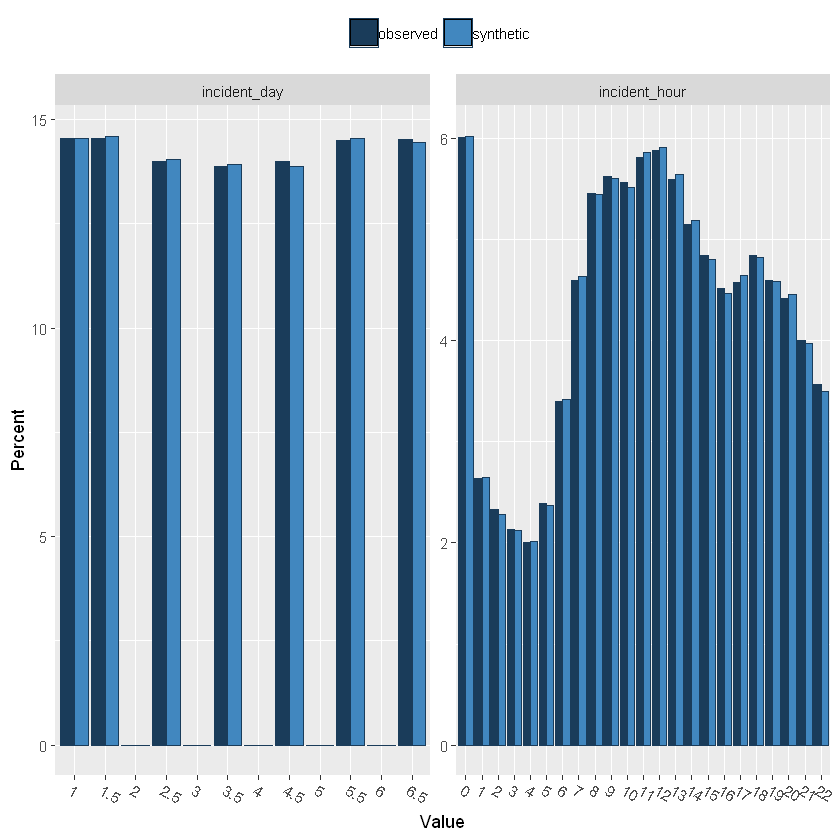

In [8]:
compare(sds.init,mydata)

In [10]:
    write.csv(sds.init$syn, file = paste("C:/Users/GIGNWI_Ar208671/PycharmProjects/synthetic_data/resources/test_1.csv", sep = ""))